In [62]:
import csv
import shapely
from shapely.geometry import Point, Polygon
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import numpy as np

#Load in the CSV Bike Station Location Data
df = pd.read_csv('../Data/HRSQ12020.csv')

#combine the latitude and longitude to make coordinates
df['coordinates'] = df[['Longitude', 'Latitude']].values.tolist()

# Change the coordinates to a geoPoint
df['coordinates'] = df['coordinates'].apply(Point)
df.head()

Station #                               Station Name  NumRacks   Latitude  \
0       1000                   Liberty Ave & Stanwix St        16  40.441326   
1       1001                 Forbes Ave & Market Square        19  40.440877   
2       1002                        Third Ave & Wood St        15  40.439030   
3       1003  First Ave & Smithfield St (Art Institute)        15  40.437200   
4       1004               First Ave & B St (T Station)        15  40.435887   

   Longitude                          coordinates  
0 -80.004679         POINT (-80.004679 40.441326)  
1 -80.003080          POINT (-80.00308 40.440877)  
2 -80.001860  POINT (-80.00185999999999 40.43903)  
3 -80.000375   POINT (-80.00037500000001 40.4372)  
4 -79.997102         POINT (-79.997102 40.435887)

In [63]:
#fixing wrong negative value for Latitude
df.loc[df["Latitude"] == df["Latitude"].min()]
df.at[80, 'Latitude'] = 40.467715

df.to_csv('../Data/bikes_station_location.csv', index=False)  

#count the number of racks at each station
rackTot = 0
for index, row in df.iterrows():
      rackTot += row['NumRacks']
print(rackTot)

1085


In [64]:
geometry = [Point(xy) for xy in zip(df.Longitude, df.Latitude)]
geobikes = gpd.GeoDataFrame(df, crs='EPSG:2956', geometry=geometry)
geobikes.head()

Station #                               Station Name  NumRacks   Latitude  \
0       1000                   Liberty Ave & Stanwix St        16  40.441326   
1       1001                 Forbes Ave & Market Square        19  40.440877   
2       1002                        Third Ave & Wood St        15  40.439030   
3       1003  First Ave & Smithfield St (Art Institute)        15  40.437200   
4       1004               First Ave & B St (T Station)        15  40.435887   

   Longitude                          coordinates                    geometry  
0 -80.004679         POINT (-80.004679 40.441326)  POINT (-80.00468 40.44133)  
1 -80.003080          POINT (-80.00308 40.440877)  POINT (-80.00308 40.44088)  
2 -80.001860  POINT (-80.00185999999999 40.43903)  POINT (-80.00186 40.43903)  
3 -80.000375   POINT (-80.00037500000001 40.4372)  POINT (-80.00038 40.43720)  
4 -79.997102         POINT (-79.997102 40.435887)  POINT (-79.99710 40.43589)

<AxesSubplot:>

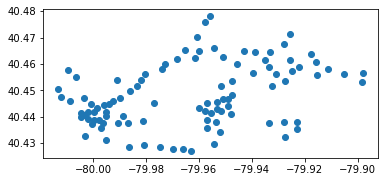

In [65]:
#plot the geodf
geobikes.plot()

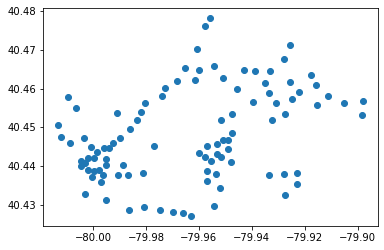

In [66]:
plt.scatter(df['Longitude'], df['Latitude'])
plt.show()

<AxesSubplot:>

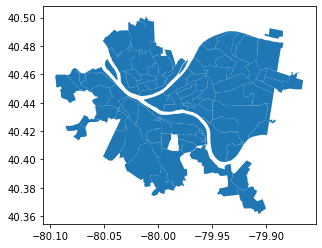

In [67]:
#Plot the Pittsburgh Neighborhoods
pittMap = gpd.read_file('../Data/Neighborhoods/ecc95d19-e9fb-46a3-be05-e7e103f362a52020328-1-565pof.jnegf.shp')
pittMap.plot()

<AxesSubplot:>

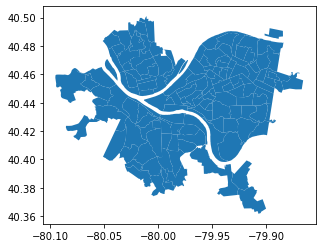

In [68]:
censusTract = gpd.read_file('../Data/2010_Census_Tracts/a36fc9b1-4e53-4fd1-80fb-db1554e213422020328-1-nbfxcj.l6b8.shp')
censusTract.plot()

In [96]:
# total area for the grid
xmin, ymin, xmax, ymax= censusTract.total_bounds

# how many cells across and down
n_cells=70
cell_size = (xmax-xmin)/n_cells
print(cell_size)
from pyproj import Proj
# projection of the grid
# crs = "+proj=lcc +lat_1=40.96666666666667 +lat_2=39.93333333333333 +lat_0=39.33333333333334 +lon_0=-77.75 +x_0=600000 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs"
crs = 4326
# create the cells in a loop
grid_cells = []
for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
    for y0 in np.arange(ymin, ymax+(cell_size), cell_size):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append(shapely.geometry.box(x0, y0, x1, y1)  )
cell = gpd.GeoDataFrame(grid_cells, columns=['geometry'], 
                                 crs=crs)
map_points = gpd.GeoDataFrame()
cell["centroid"] = cell["geometry"].centroid
map_points["geometry"] = cell["geometry"].centroid

0.0032791346693956925


/Users/katelyncmorrison/opt/anaconda3/envs/CURF/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

/Users/katelyncmorrison/opt/anaconda3/envs/CURF/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



(-80.11042072408233, -79.85071325826598, 40.35439632275482, 40.51310644075371)

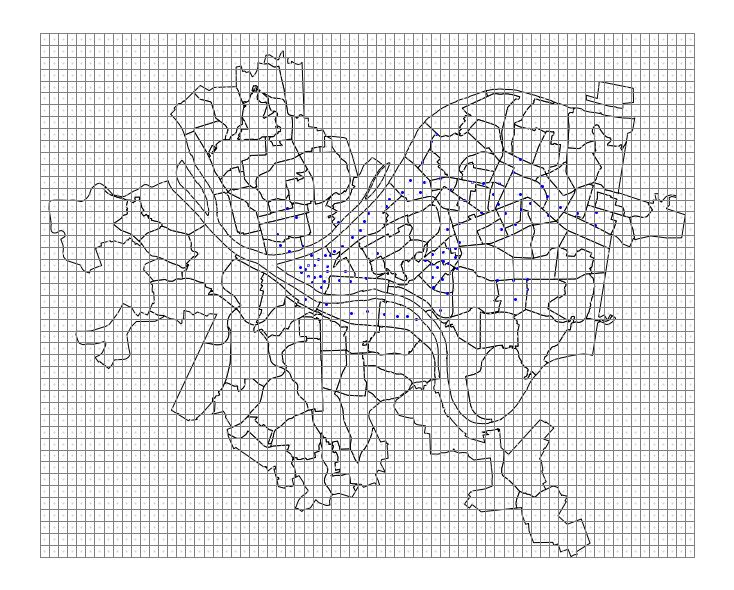

In [97]:
#Use matplotlib to plot the pittsburgh neighborhoods
fig, ax = plt.subplots(1, figsize=(10, 8))
ax.set_position([0,0,1,1])   # Puts axis to edge of figure
lims = plt.axis('equal')
ax.set_aspect('equal')
censusTract.plot(ax = ax, color='white', edgecolor='black')
#geopandas plotting was not working, so I just plotted the scatter plot on top of the map for now...
#result = plt.scatter(df['Longitude'], df['Latitude'], 15, marker='o', color='Blue')
geobikes.plot(ax=ax, markersize=4, color='blue')
map_points.plot(ax=ax, markersize=1, color='lightgrey')
cell.plot(ax=ax, facecolor="none", edgecolor='grey')
ax.axis('off')

In [98]:
cell.head(1) #has four coordinate pairs

geometry  \
0  POLYGON ((-80.09862 40.36161, -80.09862 40.364...   

                     centroid  
0  POINT (-80.09698 40.36325)

In [99]:
map_points.head(1) #has one coordinate pair

geometry
0  POINT (-80.09698 40.36325)

In [100]:
from pyproj import Proj
'''declare NAD83 State plane coordinate system for South Penn'''
p1 = Proj('+proj=lcc +lat_1=40.96666666666667 +lat_2=39.93333333333333 +lat_0=39.33333333333334 +lon_0=-77.75 +x_0=600000 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs')
'''Test with sample latitude and longitude from Pittsburgh'''
sample_lat = 40.453372848142976
sample_long = -80.00290686110762
'''convert to state plane coordinates in meters'''
sp_lat, sp_long = p1(latitude=sample_lat, longitude=sample_long)
print('sp_lat = {}, sp_long = {}'.format(sp_lat, sp_long))
'''convert back to test'''
long, lat = p1(sp_lat, sp_long, inverse=True)
print('lat = {}, long = {}'.format(lat, long))

sp_lat = 408922.433628824, sp_long = 126801.0709187566
lat = 40.45337284814283, long = -80.00290686110762


In [101]:
cell['stations'] = 0
cell['station_list'] = None
len(cell)

3168

In [102]:
len(map_points)

3168

In [120]:
cell['tractce10'] = ''

In [103]:
cell.head(5)

geometry  \
0  POLYGON ((-80.09862 40.36161, -80.09862 40.364...   
1  POLYGON ((-80.09862 40.36489, -80.09862 40.368...   
2  POLYGON ((-80.09862 40.36817, -80.09862 40.371...   
3  POLYGON ((-80.09862 40.37145, -80.09862 40.374...   
4  POLYGON ((-80.09862 40.37473, -80.09862 40.378...   

                     centroid  stations station_list  
0  POINT (-80.09698 40.36325)         0         None  
1  POINT (-80.09698 40.36653)         0         None  
2  POINT (-80.09698 40.36981)         0         None  
3  POINT (-80.09698 40.37309)         0         None  
4  POINT (-80.09698 40.37637)         0         None

In [104]:
stations_centract_df = gpd.read_file('../Data/stations_census_tracts.csv')
stations_centract_df = stations_centract_df.rename(columns={'Station #': 'station_id'})
stations_centract_df["tractce10"]= stations_centract_df["tractce10"].astype(str)
stations_centract_df["Latitude"]= stations_centract_df["Latitude"].astype(float)
stations_centract_df["Longitude"]= stations_centract_df["Longitude"].astype(float)
stations_centract_df = stations_centract_df.drop(columns=['coordinates'])

geometry = [Point(xy) for xy in zip(stations_centract_df.Longitude, stations_centract_df.Latitude)]
crs = 4326
station_gdf = gpd.GeoDataFrame(stations_centract_df, crs=crs, geometry=geometry)

for i in range(len(stations_centract_df)):
    if len(stations_centract_df.loc[i]['tractce10']) == 5:
        stations_centract_df.at[i, 'tractce10'] = '0' + stations_centract_df.loc[i]['tractce10']

### If bike station in cell, increment count for number of stations in that cell

In [112]:
stations_list = {}
for row in range(len(stations_centract_df)):
    for cellnum in range(len(cell)):
        if stations_centract_df.loc[row]["geometry"].within(cell.loc[cellnum]["geometry"]):
            cell.at[cellnum,'stations'] += 1
            stations_list.append(stations_centract_df.loc[row]['station_id'])
            ##add entire row to cell eventually

In [116]:
running = 0
for row in range(len(cell)):
    if cell.loc[row]['stations'] != 0:
#         print(row)
#         print("stations: " + str(cell.loc[row]['stations']))
        running += cell.loc[row]['stations']

In [113]:
list1 = []
for row in range(len(stations_centract_df)):
    list1.append(stations_centract_df.loc[row]['station_id'])

In [115]:
list(set(list1)-set(stations_list))

[]

In [122]:
list1

['1000',
 '1001',
 '1002',
 '1003',
 '1004',
 '1005',
 '1006',
 '1007',
 '1008',
 '1009',
 '1010',
 '1011',
 '1012',
 '1013',
 '1014',
 '1015',
 '1016',
 '1017',
 '1018',
 '1019',
 '1020',
 '1021',
 '1022',
 '1023',
 '1024',
 '1025',
 '1026',
 '1027',
 '1028',
 '1029',
 '1031',
 '1032',
 '1033',
 '1034',
 '1035',
 '1036',
 '1037',
 '1038',
 '1039',
 '1040',
 '1041',
 '1042',
 '1043',
 '1044',
 '1045',
 '1046',
 '1047',
 '1048',
 '1049',
 '1052',
 '1053',
 '1054',
 '1056',
 '1059',
 '1060',
 '1061',
 '1062',
 '1063',
 '1064',
 '1066',
 '1068',
 '1069',
 '1070',
 '1072',
 '1074',
 '1084',
 '1088',
 '1091',
 '1093',
 '1094',
 '1095',
 '1097',
 '1099',
 '49251',
 '49261',
 '49271',
 '49301',
 '49311',
 '49321',
 '49371',
 '49391',
 '49401',
 '49441',
 '49501',
 '49561',
 '49581',
 '49601',
 '49611',
 '49621',
 '49641',
 '49651',
 '49671',
 '49691',
 '49701',
 '49731',
 '49781',
 '49801',
 '49881',
 '49921',
 '49951']

## If the cell centroid is in a census tract, add the tract number to that cell

In [121]:
for row in range(len(censusTract)):
    for cellnum in range(len(cell)):
        if cell.loc[cellnum]["centroid"].within(censusTract.loc[row]["geometry"]):
            cell.at[cellnum,'tractce10'] = censusTract.loc[row]['tractce10']

In [124]:
for row in range(len(cell)):
    if cell.loc[row]['tractce10'] != '' and cell.loc[row]['stations'] != 0:
        print(cell.loc[row])

geometry        POLYGON ((-80.01335833786814 40.44686792043186...
centroid             POINT (-80.01171877053345 40.44850748776656)
stations                                                        3
station_list                                                 None
tractce10                                                  562700
Name: 1170, dtype: object
geometry        POLYGON ((-80.01335833786814 40.45014705510125...
centroid             POINT (-80.01171877053345 40.45178662243595)
stations                                                        3
station_list                                                 None
tractce10                                                  562700
Name: 1171, dtype: object
geometry        POLYGON ((-80.01007920319874 40.45670532444005...
centroid             POINT (-80.00843963586405 40.45834489177475)
stations                                                        3
station_list                                                 None
tractce10               